In [1]:
import os 
import random
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base_dir = 'DataBuah'

In [3]:
for image_class in os.listdir(base_dir):
    print(image_class)

Bahan
Latih
Validasi


In [4]:
bahan_dir = os.path.join(base_dir, 'Bahan')
train_dir = os.path.join(base_dir, 'Latih')
validation_dir = os.path.join(base_dir, 'Validasi')

In [5]:
matang_dir = os.path.join(bahan_dir, 'Matang/')
mentah_dir = os.path.join(bahan_dir, 'Mentah/')

print("Jumlah Data Train Tiap Kelas")
print('Jumlah gambar stroberi Matang :', len(os.listdir(matang_dir)))
print('Jumlah gambar stroberi Mentah :', len(os.listdir(mentah_dir)))

Jumlah Data Train Tiap Kelas
Jumlah gambar stroberi Matang : 150
Jumlah gambar stroberi Mentah : 150


In [6]:
# menentukan direktori isi Training
train_matang = os.path.join(train_dir, 'Matang/')
train_mentah = os.path.join(train_dir, 'Mentah/')

# menentukan direktori isi validasi
validation_matang = os.path.join(validation_dir, 'Matang/')
validation_mentah = os.path.join(validation_dir, 'Mentah/')

In [7]:
def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source)) 
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

#jumlah pembagian data training dan testing
train_ratio = 0.8

#pembagian training dan validasi
  #training
source_00 = matang_dir
train_00 = train_matang
val_00 = validation_matang
train_val_split(source_00, train_00, val_00, train_ratio)

  #validasi
source_01 = mentah_dir
train_01 = train_mentah
val_01 = validation_mentah
train_val_split(source_01, train_01, val_01, train_ratio)

In [8]:
print('Jumlah Semua Stroberi Matang :', len(os.listdir(matang_dir)))
print('Jumlah Train Stroberi Matang :', len(os.listdir(train_matang)))
print('Jumlah Val Stroberi Matang : ', len(os.listdir(validation_matang)))
print('Jumlah Semua Stroberi Mentah :', len(os.listdir(mentah_dir)))
print('Jumlah Train Stroberi Mentah :', len(os.listdir(train_mentah)))
print('Jumlah Val Stroberi Mentah : ', len(os.listdir(validation_mentah)))

Jumlah Semua Stroberi Matang : 150
Jumlah Train Stroberi Matang : 120
Jumlah Val Stroberi Matang :  30
Jumlah Semua Stroberi Mentah : 150
Jumlah Train Stroberi Mentah : 120
Jumlah Val Stroberi Mentah :  30


In [9]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'binary'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'binary'
)

Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy')> 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True

callbacks = myCallback()

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dropout(0.3, seed=112),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dropout(0.5, seed=112),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])


In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [33]:
model.compile(loss = 'binary_crossentropy',
              optimizer = "Adam",
              metrics = ['accuracy'])

In [34]:
history = model.fit(
            train_generator,
            steps_per_epoch = 12,
            epochs = 30,  
            validation_data = val_generator,
            validation_steps = 3,
            verbose = 1,
            callbacks =[callbacks]
)

Epoch 1/30
12/12 [==============================] - 4s 223ms/step - loss: 0.7337 - accuracy: 0.4917 - val_loss: 0.7010 - val_accuracy: 0.4333
Epoch 2/30
12/12 [==============================] - 2s 189ms/step - loss: 0.6315 - accuracy: 0.6167 - val_loss: 0.5039 - val_accuracy: 0.8000
Epoch 3/30
12/12 [==============================] - 2s 188ms/step - loss: 0.3670 - accuracy: 0.8417 - val_loss: 0.1860 - val_accuracy: 0.9667
Epoch 4/30
12/12 [==============================] - 2s 154ms/step - loss: 0.3763 - accuracy: 0.8833 - val_loss: 0.1700 - val_accuracy: 0.9333
Epoch 5/30
12/12 [==============================] - 2s 147ms/step - loss: 0.2789 - accuracy: 0.9333 - val_loss: 0.0925 - val_accuracy: 1.0000
Epoch 6/30
12/12 [==============================] - 2s 143ms/step - loss: 0.2013 - accuracy: 0.9417 - val_loss: 0.0690 - val_accuracy: 0.9667
Epoch 7/30
12/12 [==============================] - 2s 143ms/step - loss: 0.0988 - accuracy: 0.9833 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 

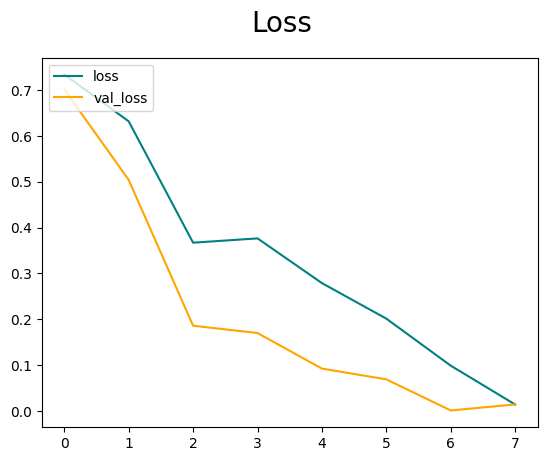

In [35]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

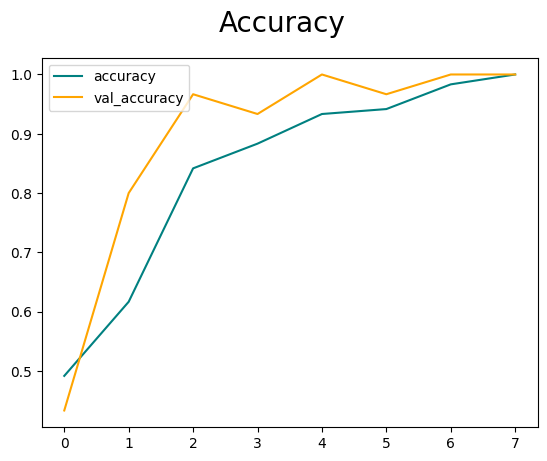

In [36]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [37]:
model.evaluate(train_generator)

24/24 [==============================] - 3s 114ms/step - loss: 0.0704 - accuracy: 0.9750


[0.07037807255983353, 0.9750000238418579]

In [38]:
model.evaluate(val_generator)

6/6 [==============================] - 1s 122ms/step - loss: 0.0315 - accuracy: 0.9833


[0.03151756152510643, 0.9833333492279053]

In [39]:
model.save("Model5.h5")